# LSTM Regressor

Autoregression and predict one day ahead

The main idea to train and test the model is shown as follows:
1. Split the training set and test set
2. Use the cross validation method to find the optimal combination of hyperparameters
3. Use the model to predict the data
4. Data visualization

Import library needed in the model

In [1]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Split the training set and test set
(Use the dataset whose outliers are deleted)

In [2]:
df=pd.read_csv('../dataset_for_analysis/data_weather_new1.csv',parse_dates=['date'])
df.set_index('date', inplace=True)

# Select the data used for model training
start_date='2000-01-01'
end_date='2020-12-31'
training_data=df[start_date:end_date]

X_mean_temp=training_data[['mean_temp']]
X_precipitation=training_data[['precipitation']]


In [3]:
X_mean_temp

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


Scaling the data

In [4]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(-1,1))
scaled_mean_temp=scalar.fit_transform(X_mean_temp[['mean_temp']])
scaled_precipitation=scalar.fit_transform(X_precipitation)

In [5]:
scaled_mean_temp

array([[-0.32110092],
       [-0.26605505],
       [-0.17431193],
       ...,
       [-0.59021407],
       [-0.58409786],
       [-0.79816514]])

In [6]:
timestep=30
X=[]
Y=[]
for i in range(len(X_mean_temp)-timestep):
    X.append(scaled_mean_temp[i:i+timestep])
    Y.append(scaled_mean_temp[i+timestep])

In [7]:
X=np.asanyarray(X)

In [8]:
Y=np.asanyarray(Y)

In [9]:
k1 = 6910
k2 = 7275
Xtrain = X[:k1,:,:]
Xtest = X[k1:k2,:,:]
X2020 = X[k2:,:,:]
Ytrain = Y[:k1]
Ytest= Y[k1:k2]
Y2020 = Y[k2:]

In [10]:
Xtrain.shape

(6910, 30, 1)

In [11]:
Xtest.shape

(365, 30, 1)

In [12]:
X2020.shape

(366, 30, 1)

## Single output (predict one day ahead)

Create the instance of tensorboard to visualize the results

In [13]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir="../lstm_results/logs")

In [14]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest), epochs=10, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/10
216/216 [==============================] - 29s 98ms/step - loss: 0.0237 - val_loss: 0.0209
Epoch 2/10
216/216 [==============================] - 19s 89ms/step - loss: 0.0163 - val_loss: 0.0141
Epoch 3/10
216/216 [==============================] - 19s 89ms/step - loss: 0.0153 - val_loss: 0.0138
Epoch 4/10
216/216 [==============================] - 20s 92ms/step - loss: 0.0150 - val_loss: 0.0150
Epoch 5/10
216/216 [==============================] - 20s 95ms/step - loss: 0.0146 - val_loss: 0.0130
Epoch 6/10
216/216 [==============================] - 20s 91ms/step - loss: 0.0142 - val_loss: 0.0143
Epoch 7/10
216/216 [==============================] - 20s 94ms/step - loss: 0.0144 - val_loss: 0.0132
Epoch 8/10
216/216 [==============================] - 21s 99ms/step - loss: 0.0139 - val_loss: 0.0139
Epoch 9/10
216/216 [==============================] - 20s 90ms/step - loss: 0.0140 - val_loss: 0.0135
Epoch 10/10
216/216 [==============================] - 19s 88ms/step - loss: 0.014

Save the model

In [15]:
model.save('../lstm_results/lstm_regressor.hdf5')

In [16]:
from tensorflow.keras.models import load_model
model=load_model('../lstm_results/lstm_regressor.hdf5')

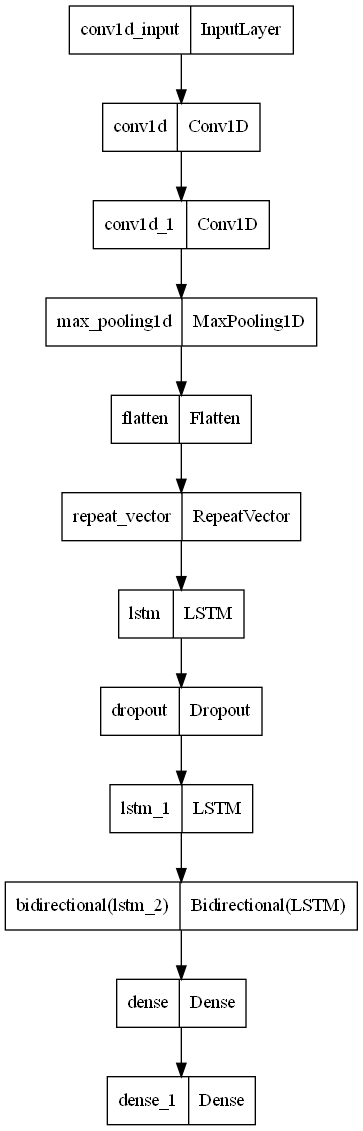

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

### Module evaluation and results visualizaiton

In [18]:
#from tensorflow.keras.models import load_model
#model=load_model('../lstm_results/lstm_regressor.hdf5')

In [19]:
predicted_result=model.predict(X2020)

12/12 [==============================] - 2s 58ms/step


In [20]:
predicted_result=scalar.inverse_transform(predicted_result)
actual_ytest=scalar.inverse_transform(Y2020)

In [21]:
predicted_result

array([[ 7.4111385],
       [ 5.4014096],
       [ 8.065934 ],
       [ 8.794919 ],
       [ 6.122509 ],
       [ 8.239473 ],
       [ 7.85656  ],
       [ 7.493322 ],
       [ 9.541757 ],
       [ 8.630006 ],
       [ 7.0061502],
       [ 8.196238 ],
       [ 8.837621 ],
       [ 7.5468297],
       [ 8.348177 ],
       [ 8.134159 ],
       [ 7.8241396],
       [ 8.614631 ],
       [ 4.771644 ],
       [ 5.074863 ],
       [ 5.5207844],
       [ 4.5871277],
       [ 5.6380053],
       [ 7.5297823],
       [ 6.8927455],
       [ 6.618281 ],
       [ 7.81489  ],
       [ 7.7480655],
       [ 6.0865464],
       [ 6.3156195],
       [ 8.659916 ],
       [ 8.916645 ],
       [ 8.70125  ],
       [ 8.658443 ],
       [ 8.798975 ],
       [ 7.035833 ],
       [ 6.7845497],
       [ 6.4990077],
       [ 5.8435016],
       [ 8.54136  ],
       [ 8.712566 ],
       [ 7.4389887],
       [ 6.994954 ],
       [ 6.2622156],
       [ 7.997942 ],
       [ 7.5035405],
       [ 8.873326 ],
       [ 9.87

In [22]:
actual_ytest

array([[ 5.06544343],
       [ 7.84525994],
       [ 8.64831804],
       [ 5.99204893],
       [ 7.35107034],
       [ 7.35107034],
       [ 7.53639144],
       [ 9.82201835],
       [ 9.63669725],
       [ 6.91865443],
       [ 7.47461774],
       [ 9.08073394],
       [ 7.16574924],
       [ 8.89541284],
       [ 8.15412844],
       [ 8.03058104],
       [ 7.78348624],
       [ 5.37431193],
       [ 4.81834862],
       [ 5.18899083],
       [ 4.38593272],
       [ 5.18899083],
       [ 7.22752294],
       [ 6.54801223],
       [ 6.42446483],
       [ 7.53639144],
       [ 7.78348624],
       [ 5.86850153],
       [ 6.23914373],
       [ 8.71009174],
       [ 9.14250765],
       [ 9.45137615],
       [ 8.64831804],
       [ 8.89541284],
       [ 6.67155963],
       [ 6.23914373],
       [ 5.49785933],
       [ 5.62140673],
       [ 8.40122324],
       [ 8.95718654],
       [ 7.16574924],
       [ 6.23914373],
       [ 5.99204893],
       [ 7.47461774],
       [ 6.98042813],
       [ 9

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(actual_ytest, predicted_result)

2.154669004635075

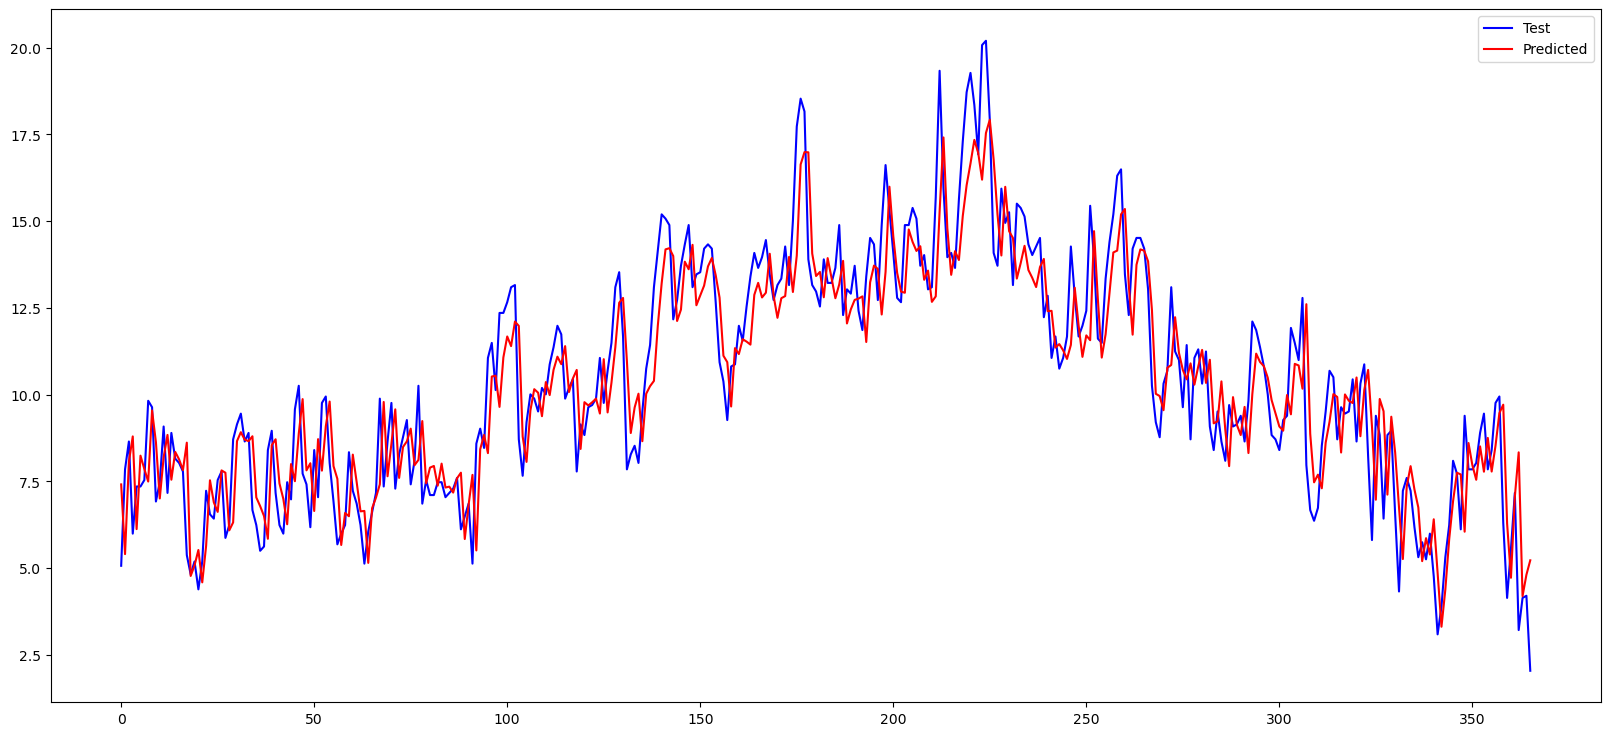

In [24]:
plt.figure(figsize=(20,9))
plt.plot(actual_ytest , 'blue')
plt.plot(predicted_result,'r')
plt.legend(('Test','Predicted'))
plt.show()

## Multiple output (predict one week ahead)